# ASSIGNMENT 4

Chap.8 - Exercise 3  

Consider the Gini index, classification error, and entropy in a
simple classification setting with two classes. Create a single plot
that displays each of these quantities as a function of ˆpm1. The xaxis
should display ˆpm1, ranging from 0 to 1, and the y-axis should
display the value of the Gini index, classification error, and entropy.

In [84]:
install.packages("ISLR")
install.packages("tree")
library(tree)
library(ISLR)
attach(Carseats)
library(randomForest)
library(dplyr)
library(ggplot2)
install.packages("gbm")
library(gbm)


  There is a binary version available but the source version is later:
     binary source needs_compilation
ISLR    1.2    1.4             FALSE



installing the source package 'ISLR'





  There is a binary version available but the source version is later:
     binary source needs_compilation
tree 1.0-40 1.0-41              TRUE

  Binaries will be installed


Warning message:
"package 'tree' is in use and will not be installed"
The following objects are masked from Carseats (pos = 8):

    Advertising, Age, CompPrice, Education, Income, Population, Price,
    Sales, ShelveLoc, Urban, US


Warning message:
"package 'gbm' is in use and will not be installed"


NULL

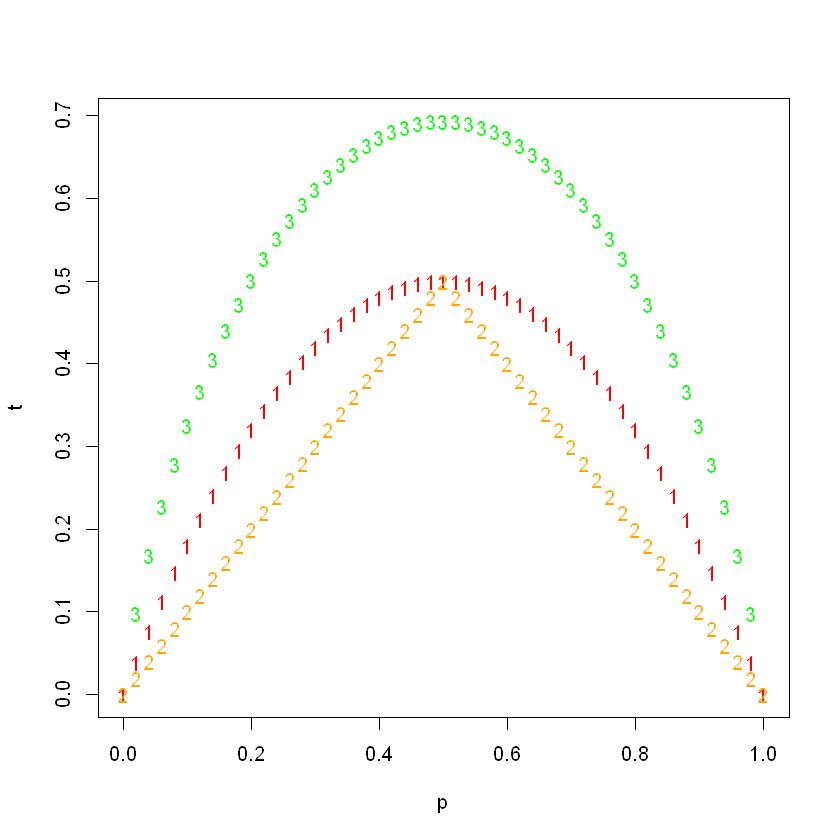

In [4]:
p = seq(0,1,0.02)
gi = p*(1-p)*2
err = 1 - pmax(p,1-p)
entropy = -((p*log(p)) + (1-p)*log(1-p))
t = cbind(gi,err,entropy)

#plot 
plot  = matplot(p,t, col=c("red","orange","green"))
plot

Exercise - 5

Suppose we produce ten bootstrapped samples from a data set
containing red and green classes. We then apply a classification tree
to each bootstrapped sample and, for a specific value of X, produce
10 estimates of P(Class is Red|X):
0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75

- Classified as RED under Majority Approach
- Classified as GREEN under Avg Approach

In [5]:
p = c(0.1,0.15,0.2,0.2,0.55,0.6,0.65,0.7,0.75)

#Majority
sum(p >= 0.5) > sum(p < 0.5)
#Average 
mean(p)

[1] TRUE

[1] 0.4333333

Exercise 8
In the lab, a classification tree was applied to the Carseats data set after
converting Sales into a qualitative response variable. Now we will
seek to predict Sales using regression trees and related approaches,
treating the response as a quantitative variable.

(a) Split the data set into a training set and a test set.

In [9]:
set.seed(50)
split = sample(dim(Carseats)[1],dim(Carseats)[1]/2)
train = Carseats[split,]
test = Carseats[-split,]

(b) Fit a regression tree to the training set. Plot the tree, and interpret
the results. What test MSE do you obtain?

Warning message:
"package 'tree' was built under R version 3.6.3"


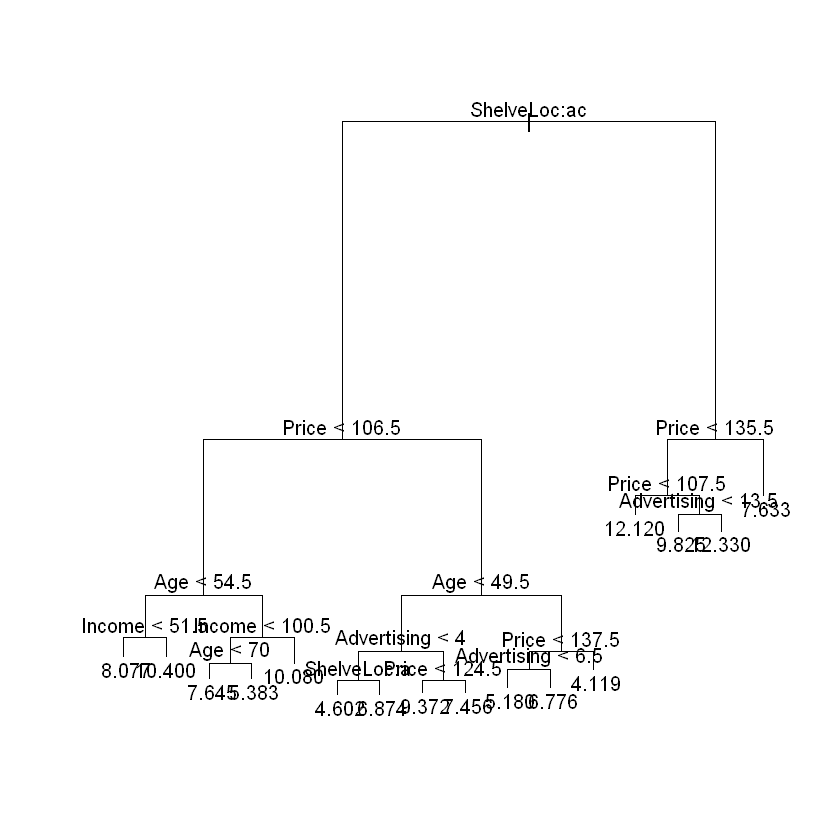

In [11]:
model_tree <- tree(Sales ~ ., train)

plot(model_tree)
text(model_tree)

In [12]:
#RMSE test
prediction = predict(model_tree, test)
mean((test$Sales - prediction)^2)

[1] 4.987855

(c) Use cross-validation in order to determine the optimal level of
tree complexity. Does pruning the tree improve the test MSE?

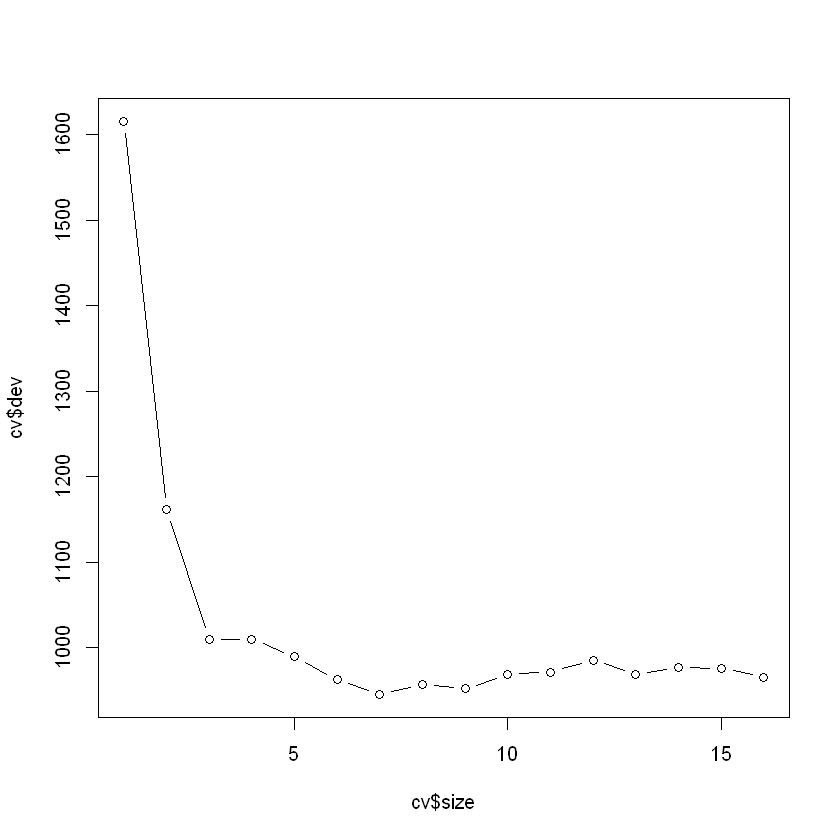

In [13]:
#Cross Validation
cv = cv.tree(model_tree, FUN = prune.tree)

plot(cv$size, cv$dev, type = "b")

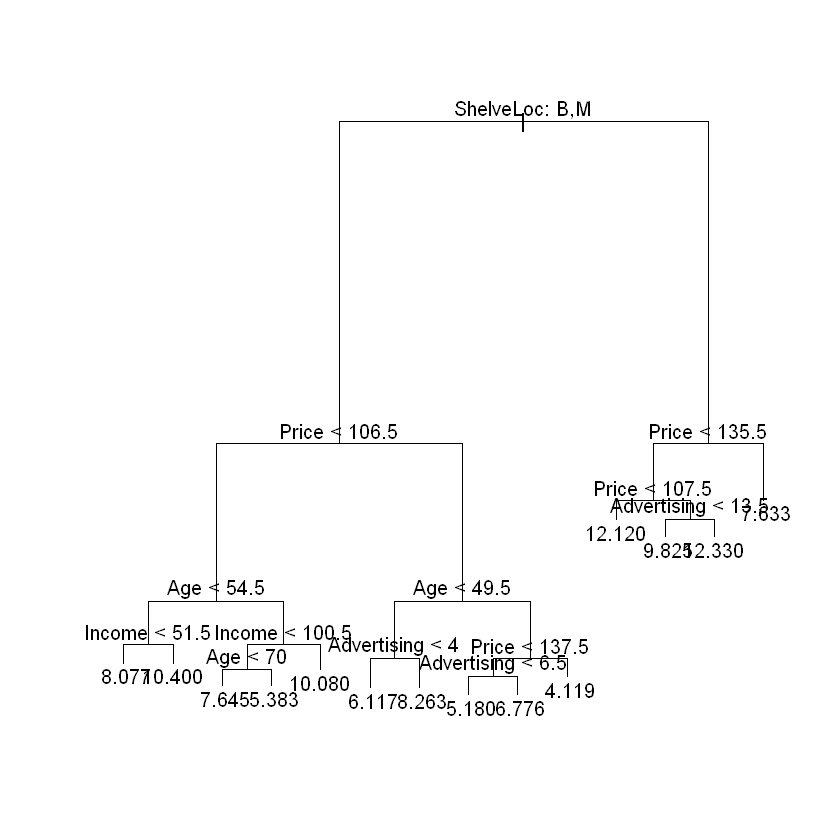

In [14]:
pruning = prune.tree(model_tree, best = 14)
plot(pruning)
text(pruning, pretty = 1)

- Pruning decreased the RMSE

In [15]:
prediction_pruning = predict(pruning, test)
mean((test$Sales - prediction_pruning)^2)

[1] 5.408981

(d) Use the bagging approach in order to analyze this data. What
test MSE do you obtain? Use the importance() function to determine
which variables are most important.

In [23]:
car = randomForest(Sales ~ ., data = train, mtry = 10, ntree = 500,importance = T)

In [25]:
prediction_car = predict(car, test)
mean((test$Sales - prediction_car)^2)

[1] 3.198966

In [26]:
importance(car)

,%IncMSE,IncNodePurity
CompPrice,16.1416110,109.617256
Income,9.5070660,95.608449
Advertising,16.5783030,107.260650
Population,1.0607246,47.754983
Price,49.3659179,418.443513
ShelveLoc,63.2183623,535.407096
Age,23.1159494,192.275150
Education,2.0692465,43.940009
Urban,-0.5195383,5.712167
US,0.1196505,5.025048


In [28]:
#E
rf.car = randomForest(Sales ~ ., data = train, mtry = 5, importance = T)

In [30]:
rf.pred = predict(rf.car, test)
mean((test$Sales - rf.pred)^2)

[1] 3.33667

In [31]:
importance(rf.car)

,%IncMSE,IncNodePurity
CompPrice,12.7664641,109.345730
Income,6.0961558,99.014301
Advertising,16.1306592,131.418092
Population,0.4388738,73.294827
Price,40.8063488,392.744472
ShelveLoc,52.6754249,441.187458
Age,20.1254967,201.152577
Education,2.2314799,56.279970
Urban,-1.2605914,8.885945
US,3.2663597,15.236938


Exercise - 9

In [32]:
library(ISLR)
attach(OJ)

(a) Create a training set containing a random sample of 800 observations,
and a test set containing the remaining observations.

In [72]:
set.seed(50)
split= sample(dim(OJ)[1],800)
train = OJ[split,]
test = OJ[-split,] # nolint

(b) Fit a tree to the training data, with Purchase as the response
and the other variables as predictors. Use the summary() function
to produce summary statistics about the tree, and describe the
results obtained. What is the training error rate? How many
terminal nodes does the tree have?

In [74]:
library(tree)
model_tree = tree(Purchase ~ ., train)
summary(model_tree)


Classification tree:
tree(formula = Purchase ~ ., data = train)
Variables actually used in tree construction:
[1] "LoyalCH"       "PriceDiff"     "SalePriceMM"   "ListPriceDiff"
Number of terminal nodes:  9 
Residual mean deviance:  0.7059 = 558.3 / 791 
Misclassification error rate: 0.1475 = 118 / 800 

(d) Create a plot of the tree, and interpret the results

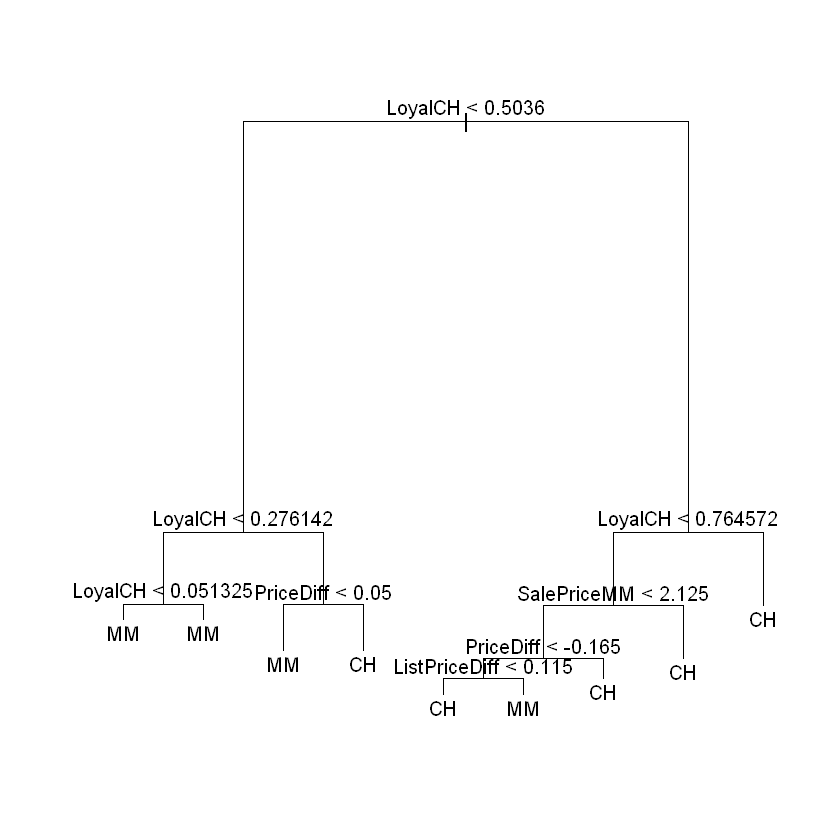

In [76]:
#Plotting the tree
plot(model_tree)
text(model_tree, pretty=0)

(e) Predict the response on the test data, and produce a confusion
matrix comparing the test labels to the predicted test labels.
What is the test error rate?

In [79]:
#Prediction
pred_tree = predict(model_tree, test, type = "class")

#Confusion Matrix
table(test$Purchase, pred_tree)

    pred_tree
      CH  MM
  CH 147  18
  MM  36  69

(f) Apply the cv.tree() function to the training set in order to
determine the optimal tree size.

In [80]:
cv.oj = cv.tree(model_tree, FUN = prune.tree)

(g) Produce a plot with tree size on the x-axis and cross-validated
classification error rate on the y-axis.

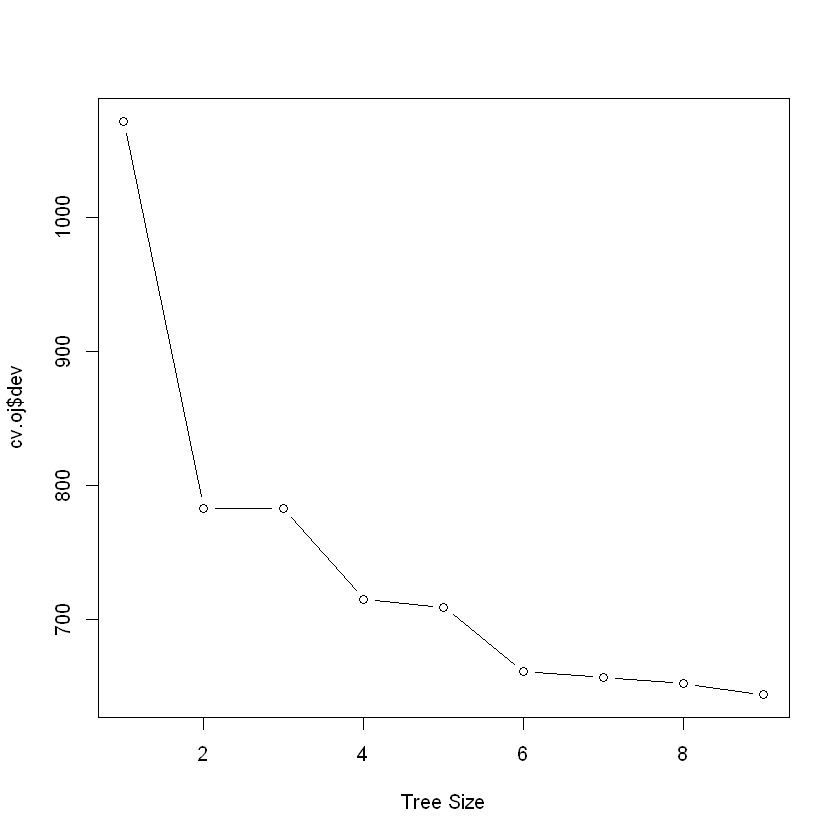

In [81]:
plot(cv.oj$size, cv.oj$dev, type = "b", xlab = "Tree Size")

h (i) Produce a pruned tree corresponding to the optimal tree size
obtained using cross-validation. If cross-validation does not lead
to selection of a pruned tree, then create a pruned tree with five
terminal nodes.

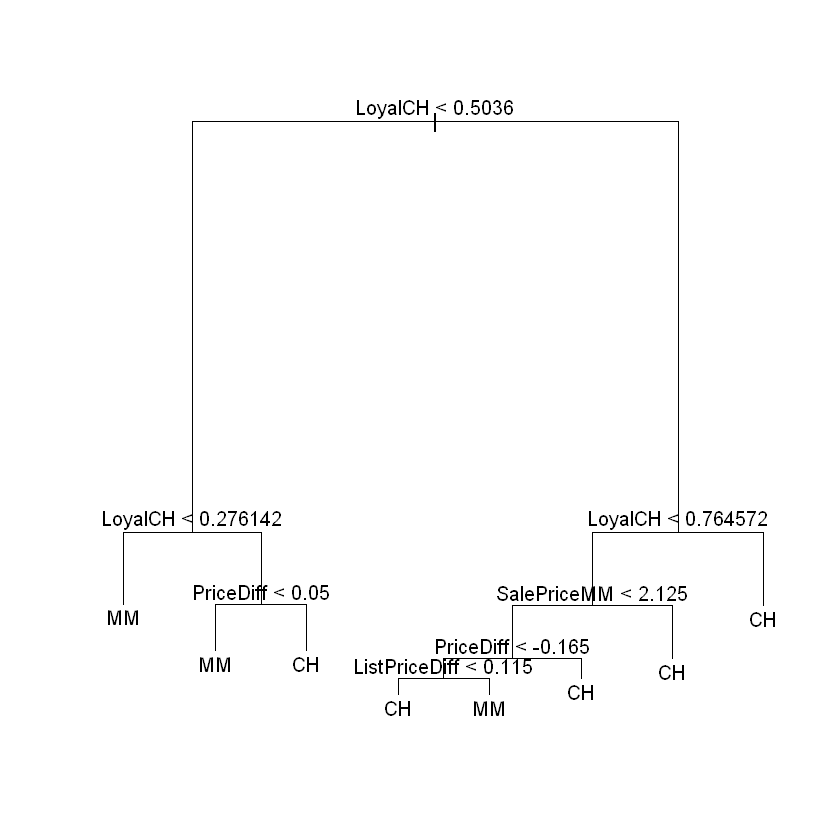

In [83]:

pruned_tree <- prune.misclass(model_tree, best = 5)
plot(pruned_tree)
text(pruned_tree)

Exercise 10

In [41]:
rm("Hitters")

Warning message in rm("Hitters"):
"object 'Hitters' not found"


(a) Remove the observations for whom the salary information is
unknown, and then log-transform the salaries.

In [52]:
hitter_data = Hitters[-which(is.na(Hitters$Salary)),]

(b) Create a training set consisting of the first 200 observations, and
a test set consisting of the remaining observations.

In [53]:
split = 1:200
train = hitter_data[split,]
test=hitter_data[-split,]

(c) Perform boosting on the training set with 1,000 trees for a range
of values of the shrinkage parameter λ. Produce a plot with
different shrinkage values on the x-axis and the corresponding
training set MSE on the y-axis.

In [59]:

lambda = seq(0.01, 0.5, by = 0.01)
length = length(lambda)
train_errors = rep(NA, length)
test_errors = rep(NA, length)
for (i in 1:length) {
    boost.hitters = gbm(Salary ~ .,train, distribution = "gaussian",n.trees = 1000, shrinkage = lambda[i])
    pred_train = predict(boost.hitters, train, n.trees = 1000)
    pred_test = predict(boost.hitters, test, n.trees = 1000)
    train_errors[i] = mean((train$Salary - pred_train)^2)
    test_errors[i] = mean((test$Salary - pred_test)^2)
}

Warning message:
"package 'gbm' is in use and will not be installed"


(d) Produce a plot with different shrinkage values on the x-axis and
the corresponding test set MSE on the y-axis.

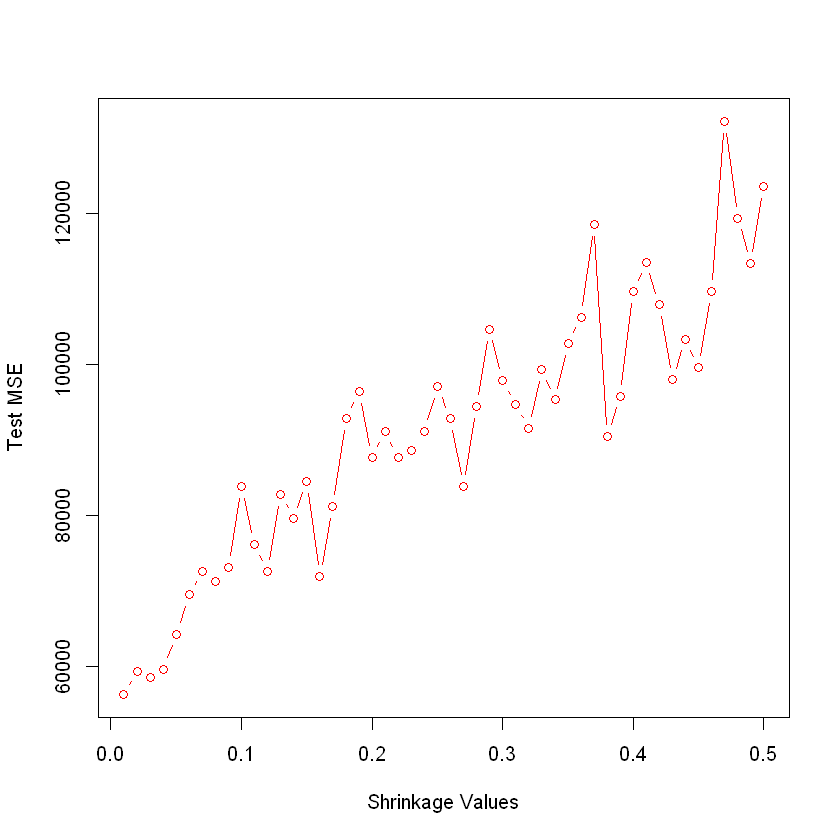

In [62]:
plot(lambda, test_errors, type = "b", xlab = "Shrinkage Values", ylab = "Test MSE",col = "red")

,var,rel.inf
CHmRun,CHmRun,17.74646366
Walks,Walks,11.73014391
Hits,Hits,9.42781277
CAtBat,CAtBat,8.66215137
Years,Years,7.68237445
CWalks,CWalks,6.02158585
CRBI,CRBI,5.99037520
CRuns,CRuns,5.98970329
PutOuts,PutOuts,5.38157788
CHits,CHits,4.39019408


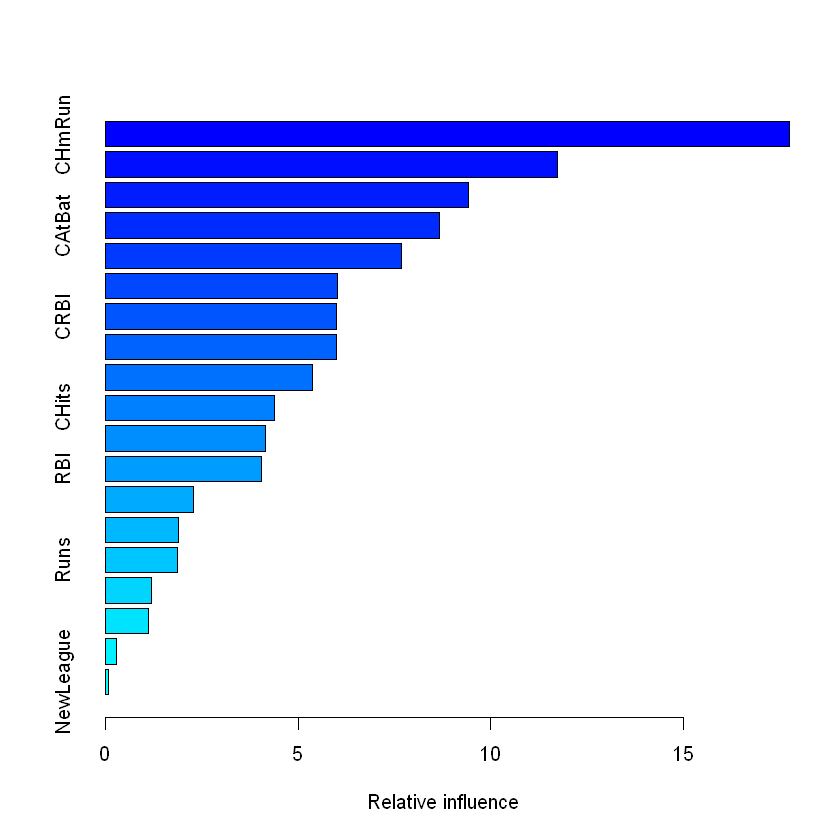

In [66]:
best = lambda[which.min(test.errors)]
best_boost = gbm(Salary ~ .,train, distribution = "gaussian",n.trees = 1000, shrinkage = best)
summary(best_boost)

CHmRun, Walks and Hits seems to be the top 3 important Variables.

(g) Now apply bagging to the training set. What is the test set MSE
for this approach?

In [64]:
hitters_bagging = randomForest(Salary ~ .,train, mtry = 10, ntree = 500)
pred_bag = predict(hitters_bagging, test)
mean((test$Salary - pred_bag)^2)

[1] 54175.15